In [205]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings

#For plotting styles
import sys
PlottingFormat_Folder = '/home/sheffieldlab/Desktop/NoReward/Scripts/PlottingTools/'
sys.path.append(PlottingFormat_Folder)
import plottingfunctions as pf

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import behavior data from all animals

In [206]:
from VelocityAnalysis import Velocity as v
#Just select tasks to plot for now
task_dict = {'Task1':'Reward', 'Task2':'No Reward', 'Control':'Control'}
colors_dict = {'Task1':'#2c7bb6', 'Task2':'#d7191c', 'Control':'#a6dba0'}
lighter_colors_dict = {'Task1':'#67a9cf', 'Task2':'#ef8a62'}

In [207]:
ExperimentFolderName = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/'
ExperimentAnimals = ['NR6', 'NR15','NR14', 'NR21', 'NR23' ]
ControlFolderName = '/home/sheffieldlab/Desktop/NoReward/ControlData/'
ControlAnimals = ['CFC3', 'CFC4']
SaveFigureFolder = '/home/sheffieldlab/Desktop/NoReward/FiguresforPaper'

In [208]:
A = v(ExpFolderName=ExperimentFolderName, ExpAnimals=ExperimentAnimals, 
      ControlFolderName=ControlFolderName, ControlAnimals=ControlAnimals,
      TaskDict=task_dict, TaskColors=colors_dict, TaskColors_lighter=lighter_colors_dict)

### Plot distribution of velocity per lap

In [209]:
v1, v1_perlap = A.calculate_lapwise_velocity()

Loading.. NR6
Loading.. NR15
Loading.. NR14
Loading.. NR21
Loading.. NR23


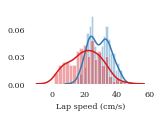

In [210]:
pf.set_style()
width = 220
fig, ax = plt.subplots(1, 1, figsize=pf.set_size(width, fraction=0.7))
A.plot_lapwise_velocity(v1, ax)
pf.set_axes_style(ax, 3)
fig.savefig(os.path.join(SaveFigureFolder, 'LapVelocityDistribution.pdf'), bbox_inches='tight', dpi=500)

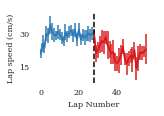

In [211]:
pf.set_style()
width = 150
fig, ax = plt.subplots(1, 1, figsize=pf.set_size(width))
A.plot_velocityorslopeperlap(v1_perlap, ax, ylabel='Lap speed (cm/s)', yrev=False)
pf.set_axes_style(ax, 3)
fig.savefig(os.path.join(SaveFigureFolder, 'Lapspeed_perlap.pdf'), bbox_inches='tight', dpi=500)

### Plot distribution of speed in space

#### Plot an example data

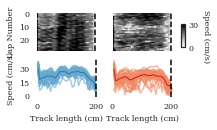

In [212]:
pf.set_style()
width = 150
fig, ax = plt.subplots(2, 2, figsize=pf.set_size(width, fraction=1.2), sharex='row', sharey='row')
A.plot_sample_velocity_inspace_inoneanimal('NR6', fig, ax)
for a in ax.flatten():
    pf.set_axes_style(a, 3)
fig.savefig(os.path.join(SaveFigureFolder, 'Velocityinspace_insampleanimal.pdf'), bbox_inches='tight', dpi=500)

#### Plot an example lap

(53,) (397,) (397,) 0 0.0 12.40625
(54,) (371,) (371,) 397 12.40625 24.0
(66,) (395,) (395,) 768 24.0 36.34375
(53,) (441,) (441,) 1163 36.34375 50.125


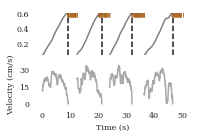

In [292]:
pf.set_style()
width = 200
fig, ax = plt.subplots(2, figsize=pf.set_size(width), sharex='col')
A.plot_lapdata_fromsamplelaps('NR6', [4, 12, 14, 23], ax)
for a in ax:
    pf.set_axes_style(a, 3)
fig.savefig(os.path.join(SaveFigureFolder, 'Samplelapvelocityandlick_inoneanimal.pdf'), bbox_inches='tight', dpi=500)

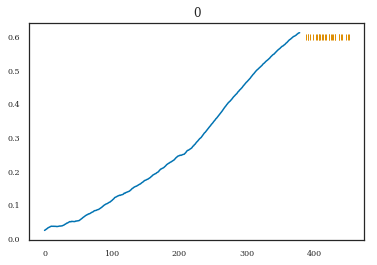

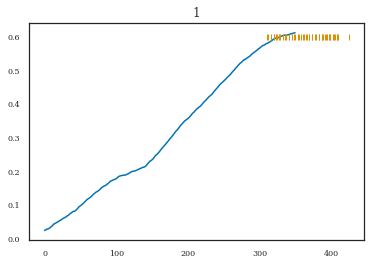

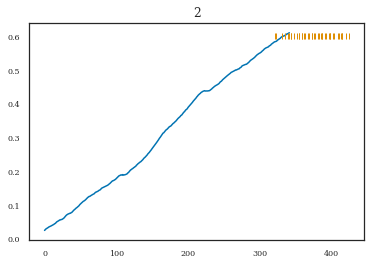

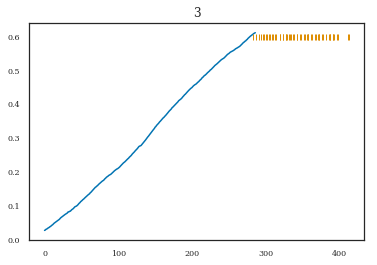

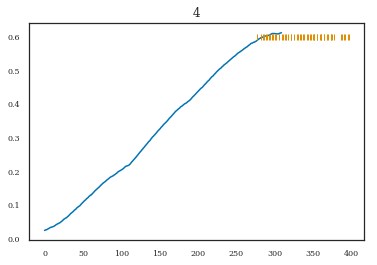

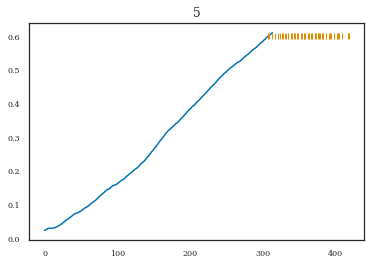

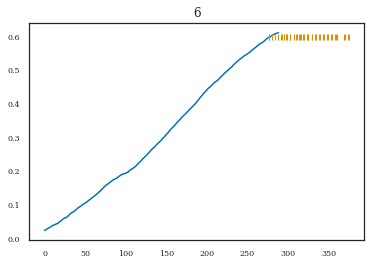

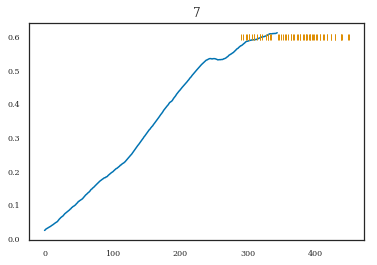

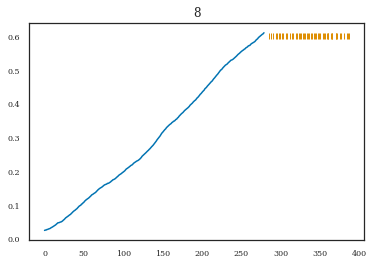

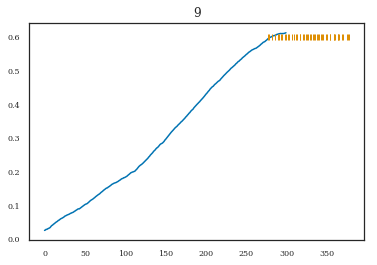

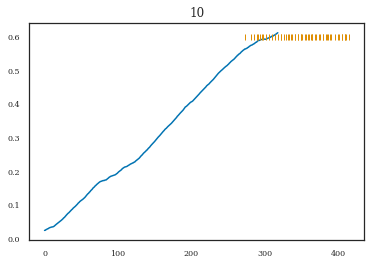

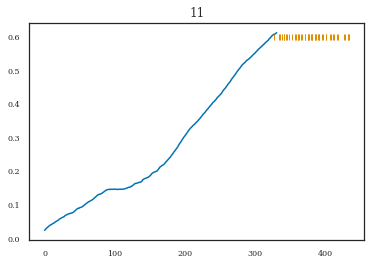

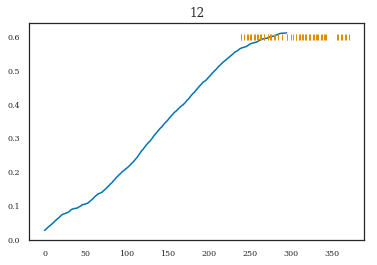

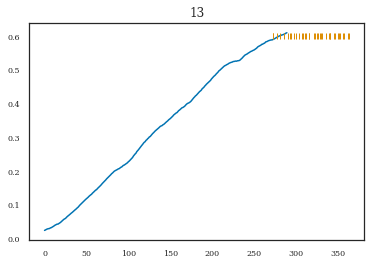

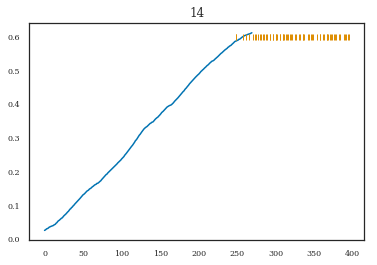

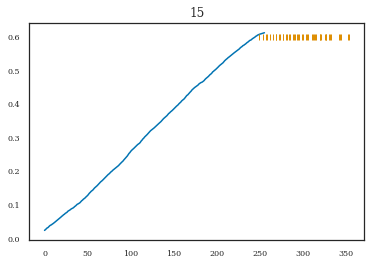

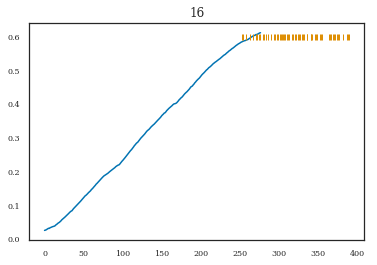

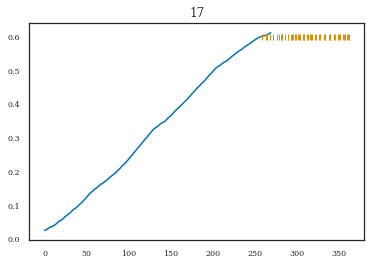

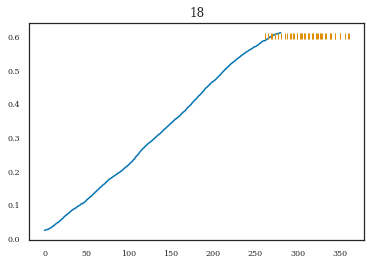

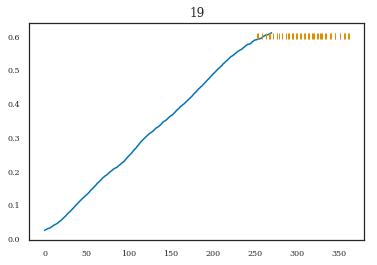

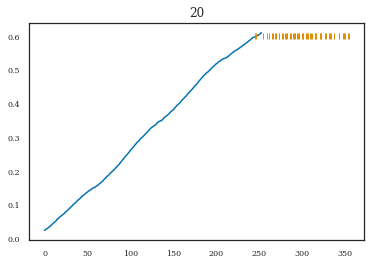

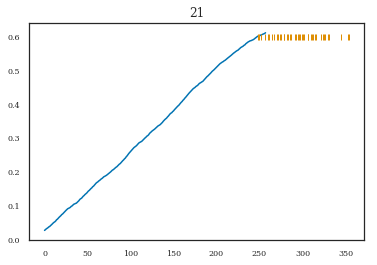

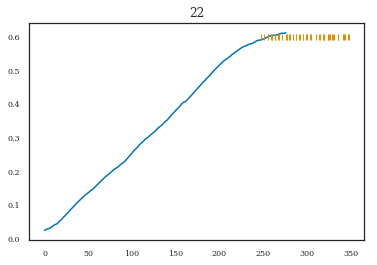

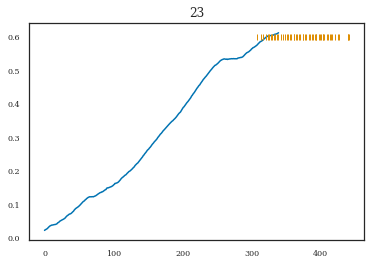

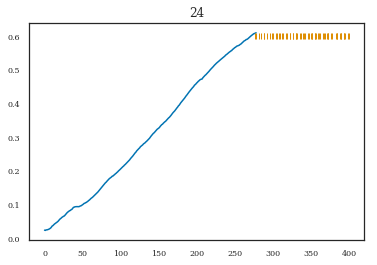

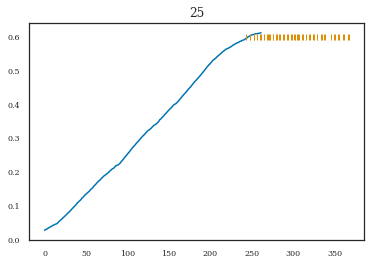

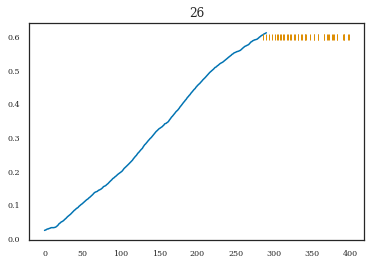

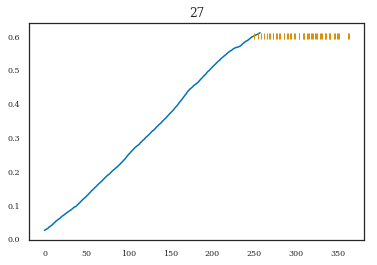

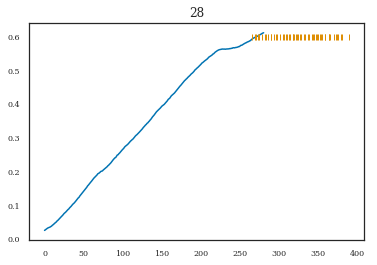

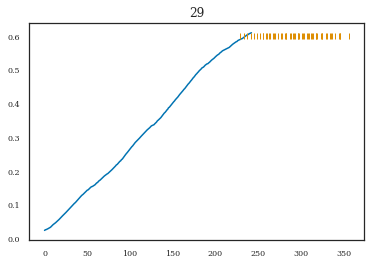

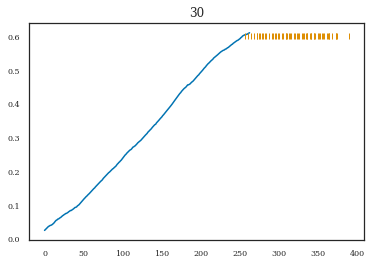

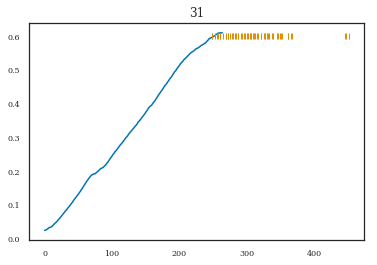

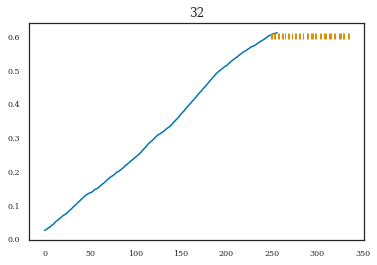

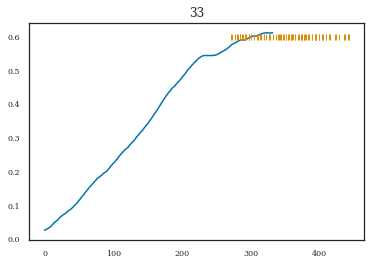

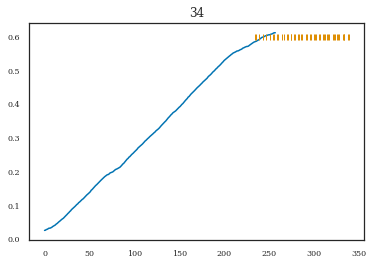

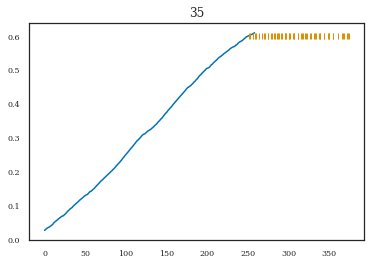

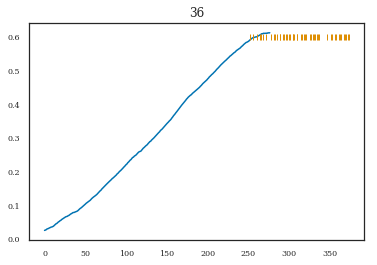

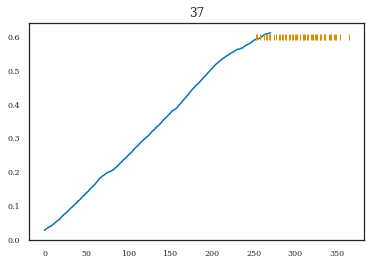

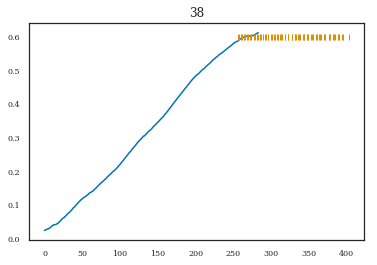

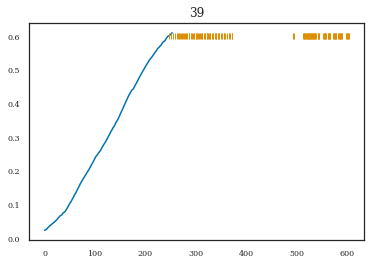

In [250]:
for i in np.arange(40):
    lapdata = data['actualrunninglaps'].item()['Task1'][i]
    lickdata = data['lickperlap'].item()['Task1'][i]
    lickdata = np.where(lickdata>1)[0]

    plt.plot(lapdata)
    plt.plot(lickdata, np.ones(np.size(lickdata))*0.6, '|')
    plt.title(i)
    plt.show()

#### Plot slope of velocity by spatial bins

Loading.. NR6


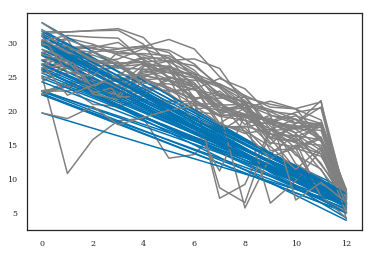

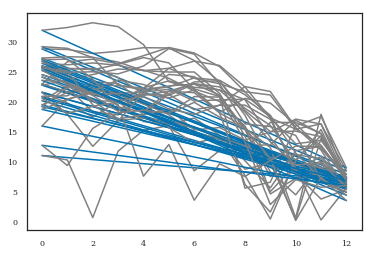

Loading.. NR15


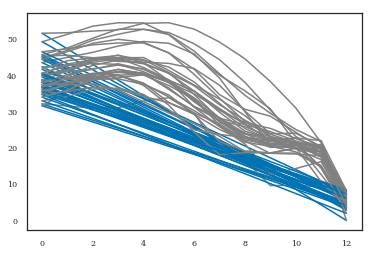

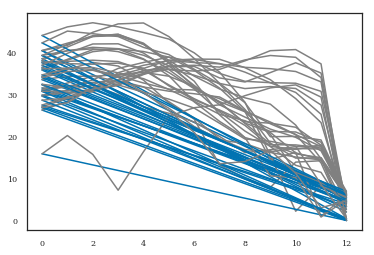

Loading.. NR14


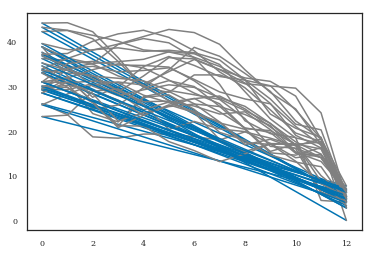

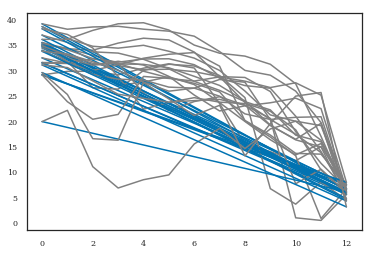

Loading.. NR21


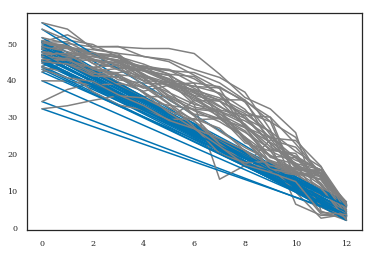

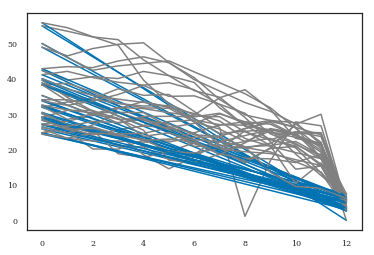

Loading.. NR23


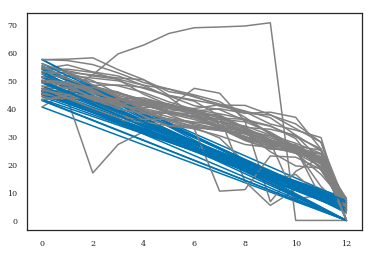

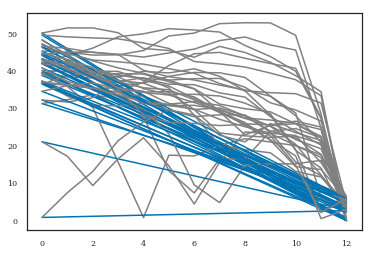

In [9]:
v3, lapwise_slopes = A.get_slope_of_velocityinspace()
v3 = v3.replace({'Bin':{'Bin0':'Beginning', 'Bin1':'Middle', 'Bin2':'End'}})

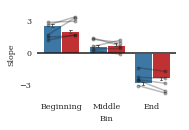

In [36]:
pf.set_style()
width = 150
fig, ax = plt.subplots(1, figsize=pf.set_size(width, fraction=1.2))
A.plot_slope(v3, ax)
pf.set_axes_style(ax, 3)
fig.savefig(os.path.join(SaveFigureFolder, 'SlopeofVelocityinspace.pdf'), bbox_inches='tight', dpi=500)

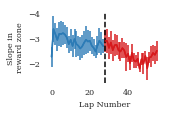

In [11]:
pf.set_style()
width = 150
fig, ax = plt.subplots(1, figsize=pf.set_size(width))
A.plot_velocityorslopeperlap(lapwise_slopes, ax, ylabel='Slope in\nreward zone')
pf.set_axes_style(ax, 3)
fig.savefig(os.path.join(SaveFigureFolder, 'SlopeofVelocityinendzone_perlap.pdf'), bbox_inches='tight', dpi=500)